---
title: "Airline Passenger Satisfaction"
subtitle: "Clustering and Multivariate Visualisation with `python`"
author: "solar-san"
date-modified: "2023-11-03"
format:
  html:
    theme: github
    toc: true
    toc-location: left
    fig-align: center
    fig-width: 8
    fig-height: 8
    html-math-method: katex
    code-overflow: scroll
    code-copy: hover
    highlight-style: github
    citations-hover: true
    footnotes-hover: true
    header-includes: |
      <meta name="author" content="solar-san">
      <meta 
      name="description" 
      content="">
      <link rel="preconnect" href="https://fonts.googleapis.com">
      <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
      <link href="https://fonts.googleapis.com/css2?family=Atkinson+Hyperlegible:ital,wght@0,400;0,700;1,400;1,700&family=Fira+Code&display=swap" rel="stylesheet">
mainfont: "Atkinson Hyperlegible"
monofont: 'Fira Code'
---

![](figures/Kaggle-airplane_passenger_header.png)

# Imports

In [1]:
#!/bin/sh kaggle datasets download -d teejmahal20/airline-passenger-satisfaction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import zipfile
import shutil


from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# %matplotlib widget
np.set_printoptions(precision=3)

In [3]:
with zipfile.ZipFile(
    "data/airline-passenger-satisfaction.zip",
    'r'
) as zip_ref:
    zip_ref.extractall("data/unzipped/")

train = pd.read_csv(
    "data/unzipped/train.csv"
)
test = pd.read_csv(
    "data/unzipped/test.csv"
)
shutil.rmtree(
    "data/unzipped/"
)

# Data cleaning and preparation

In [4]:
# passengers_df = pd.concat(
#     [
#         pd.read_csv(
#             data_path + "train.csv"
#             ),
#         pd.read_csv(
#             data_path + "test.csv"
#             )
#     ],
#     axis=0
#     )

passengers_df = train

In [5]:
passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
passengers_df.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

## Variables description

1. Categorical variables:
    - `Gender`: gender of the passengers (Female, Male)
    - `Customer Type`: The customer type (Loyal customer, disloyal customer)
    - `Type of Travel`: purpose of the flight of the passengers (Personal Travel, Business Travel)
    - `Class`: travel class in the plane of the passengers (Business, Eco, Eco Plus)
    - `Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
2. Numerical variables:
    - `Age`: the actual age of the passengers
    - `Flight distance`: the flight distance of this journey
    - `Inflight wifi service`: satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
    - `Departure/Arrival time convenient`: satisfaction level of Departure/Arrival time convenient
    - `Ease of Online booking`: satisfaction level of online booking
    - `Gate location`: satisfaction level of Gate location
    - `Food and drink`: satisfaction level of Food and drink
    - `Online boarding`: satisfaction level of online boarding
    - `Seat comfort`: satisfaction level of Seat comfort
    - `Inflight entertainment`: satisfaction level of inflight entertainment
    - `On-board service`: satisfaction level of On-board service
    - `Leg room service`: satisfaction level of Leg room service
    - `Baggage handling`: satisfaction level of baggage handling
    - `Check-in service`: satisfaction level of Check-in service
    - `Inflight service`: satisfaction level of inflight service
    - `Cleanliness`: satisfaction level of Cleanliness
    - `Departure Delay in Minutes`: Minutes delayed when departure
    - `Arrival Delay in Minutes`: Minutes delayed when Arrival

## Data cleaning

1. Removing unnecessary variables.

In [7]:
passengers_df.drop(
    [
        "Unnamed: 0",
        "id"
    ],
    axis=1,
    inplace=True
)

2. Transforming categorical variables.



In [8]:
passengers_df = pd.get_dummies(
    passengers_df,
    dtype="float",
    prefix="",
    prefix_sep=""
)

In [9]:
passengers_df.head()

Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               5                3             5                       5  ...   
1               1                3             1                       1  ...   
2               5                5             5                       5  ...   
3               2                2             2                       2  ...   
4               4                5             5                       3  ...   

   Male  Loyal Customer  disloyal Customer  Business travel  Personal Travel  \
0   1.0             1.0                0.0              0.0              1.0   
1   1.0             0.0                1.0              1.0              0.0   
2   0.0             1.0                0.0              1.0              0.0   
3   0.0             1.0                0.0              1.0              0.0   
4   1.0             1.0                0.0              1.0              0.0   

   Business  Eco  Eco Plus  neutral or dissatisfied  satisfied  
0       0.0  0.0       1.0                      1.0        0.0  
1       1.0  0.0       0.0                      1.0        0.0  
2       1.0  0.0       0.0                      0.0        1.0  
3       1.0  0.0       0.0                      1.0        0.0  
4       1.0  0.0       0.0                      0.0        1.0  

[5 rows x 29 columns]

In [10]:
passengers_df.dropna(
    inplace=True
)

# PCA

In [11]:
passengers_2d = PCA(
    n_components=2,
)
passengers_2d.fit(passengers_df)

PCA(n_components=2)

In [12]:
passengers_2d.explained_variance_ratio_.sum()

0.9996962403495983

In [30]:
df_reduced_2d = passengers_2d.transform(passengers_df)
fig = px.scatter(df_reduced_2d[:, 0], y = df_reduced_2d[:, 1])
fig.show()

/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


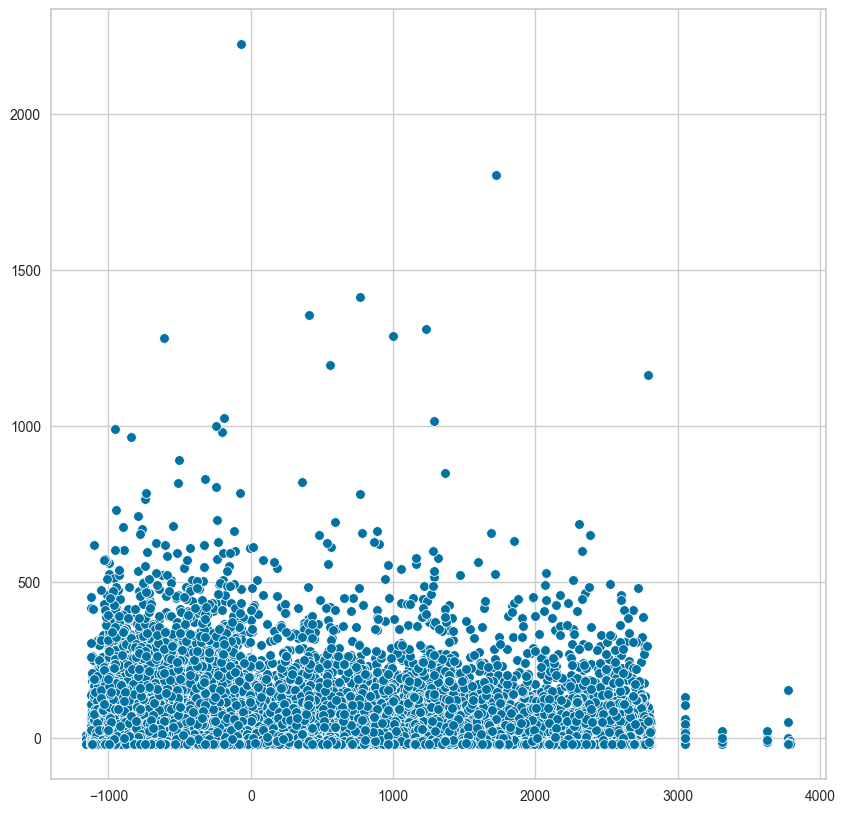

In [14]:
#| warning: false
#plt.ioff()
df_reduced_2d = passengers_2d.transform(passengers_df)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(x = df_reduced_2d[:, 0], y = df_reduced_2d[:, 1])
plt.show();

/var/folders/mm/nzts_rm10vzfv61dt475_5xh0000gp/T/ipykernel_4030/2562935134.py:9: RuntimeWarning: invalid value encountered in log
  y = np.log(
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

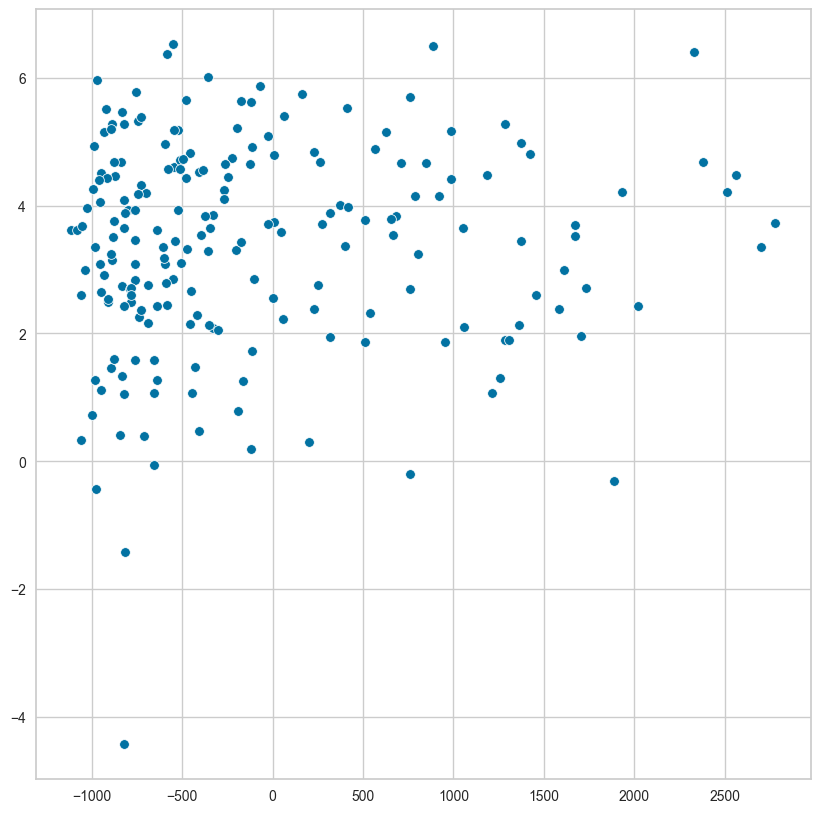

In [15]:
downsampling_idx = df_reduced_2d[np.random.choice(df_reduced_2d.shape[0], 1000, replace=False)]
fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(
    x = downsampling_idx[:, 0], 
    y = np.log(
        downsampling_idx[:, 1]
        )
    )

---

I am not sure that this visualization helps. Further down I will try and add colors corresponding to the clusters, to see if this is helpful or not.

# $K$-Means

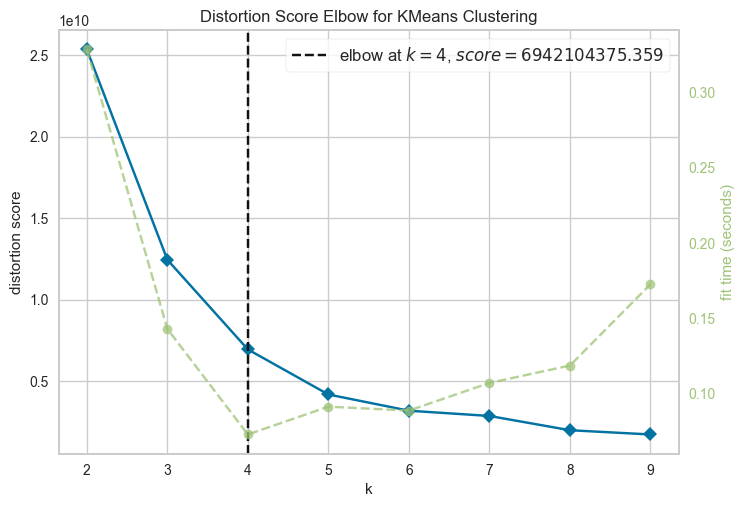

In [16]:
plt.ioff()
model = KMeans(
    n_init = 'auto',
    random_state = 19
)
elbow_3 = KElbowVisualizer(model, k = (2, 10))
elbow_3.fit(df_reduced_2d)
elbow_3.show();

## $K = 4$

In [17]:
km_4 = KMeans(
    n_clusters = 4,
    n_init = 'auto',
    random_state = 19
)

km_4.fit(
    df_reduced_2d,
)


KMeans(n_clusters=4, n_init='auto', random_state=19)

/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

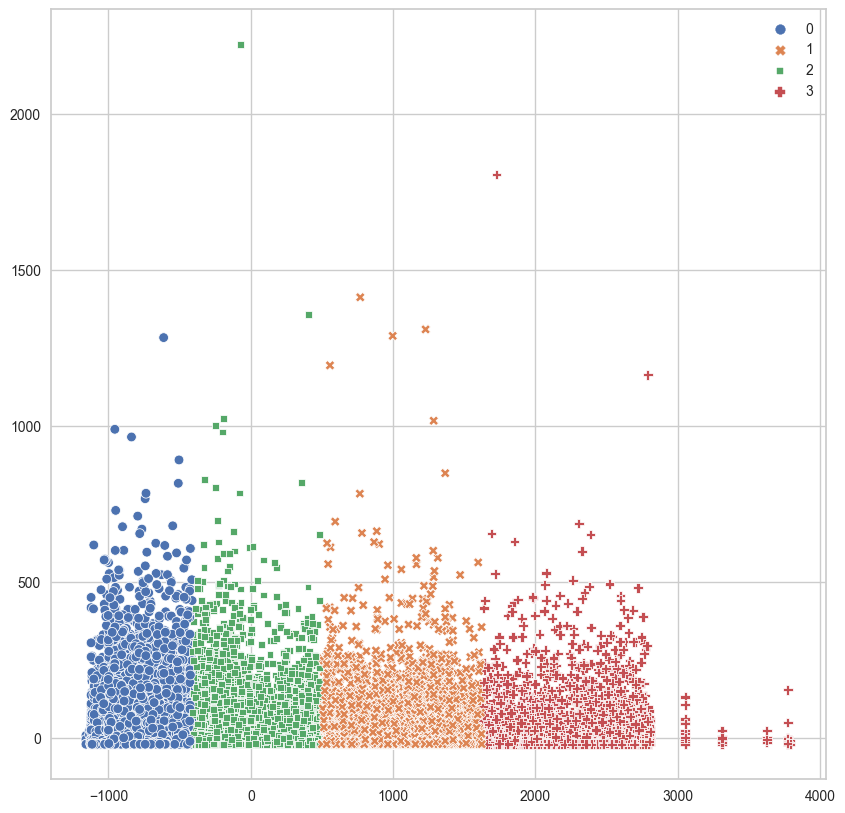

In [18]:
plt.ioff()
y_km_4 = km_4.predict(df_reduced_2d)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(x = df_reduced_2d[:, 0], y = df_reduced_2d[:, 1], hue=y_km_4,  style=y_km_4, palette="deep")
plt.show();

---

The clustering algo worked also in this situation with a good performance. Seems like if I follow the insight given by the _Elbow method_, it affects positively the computation time.

In [19]:
km_4 = KMeans(
    n_clusters = 4,
    n_init = 'auto',
    random_state = 19
)

%timeit km_4.fit(df_reduced_2d)

104 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Further testing is needed on the whole processing chain. However, there is an important aspect left that needs more study to be understood. 

I need a way to visualize the clusters. This can be done easily since the output of the `predict` methods allows me to obtain a `Series` of labels. This means that I can use that information as a __grouping label__ and apply a `mean` method to the resulting group to obtain a syntethic rapresentation of the __KMC__ ($K$-th Mean Customer). I only need to:

- Create a df with the results and use that for the grouping variables.
- Create an array that contains both the resulting compressed data from the PCA 2D and the corresponding labels; _then_ I can downsample the dataset and tranform it to better visualize the clusters. This ensures that all the labels and shapes fit together.

/var/folders/mm/nzts_rm10vzfv61dt475_5xh0000gp/T/ipykernel_4030/418485159.py:9: RuntimeWarning: invalid value encountered in log
  y = np.log(
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


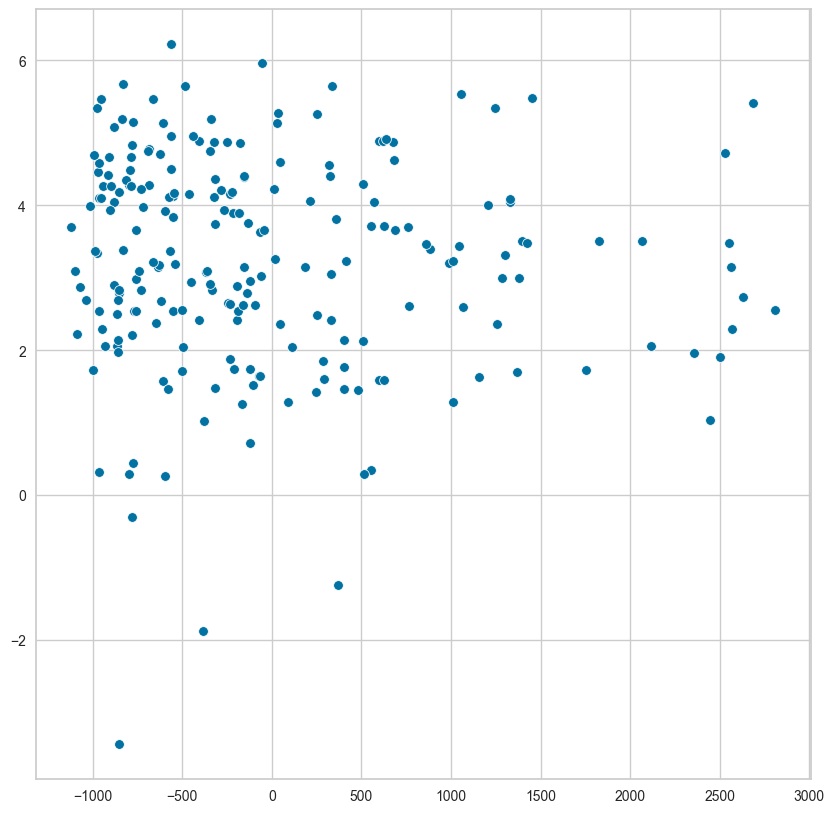

In [20]:


downsampling_idx = df_reduced_2d[np.random.choice(df_reduced_2d.shape[0], 1000, replace=False)]
fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(
    x = downsampling_idx[:, 0], 
    y = np.log(
        downsampling_idx[:, 1]
        )
    )
plt.show();

/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

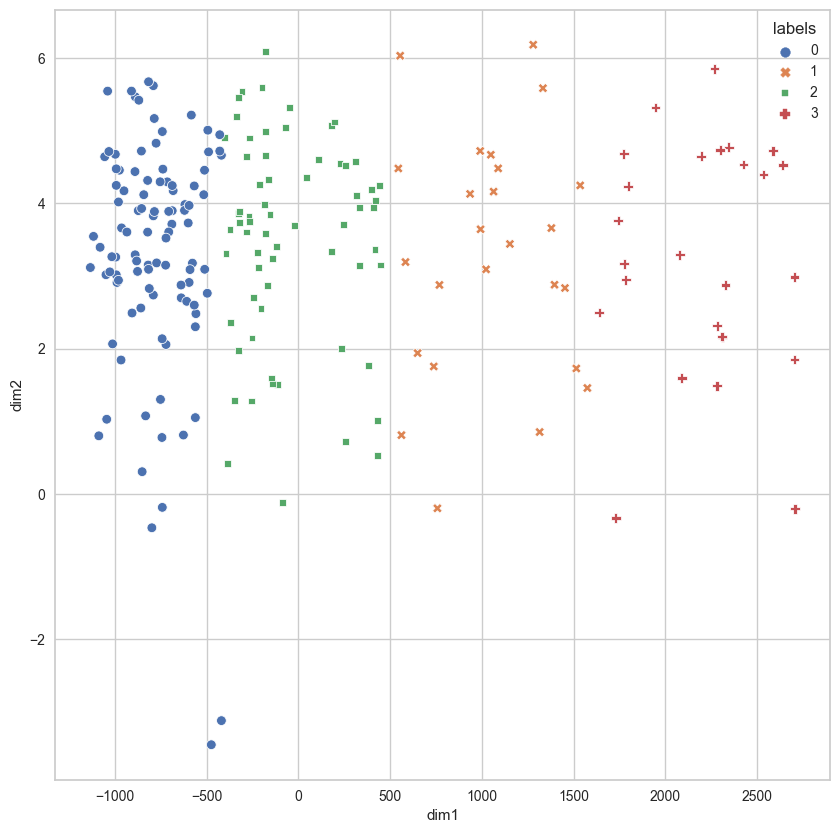

In [21]:
viz_df_2D = pd.DataFrame(
    {"dim1": df_reduced_2d[:, 0],
     "dim2": df_reduced_2d[:, 1],
     "labels": y_km_4
    }
)

downsampling_idx = viz_df_2D.sample(n = 1000, axis=0)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(
    downsampling_idx, 
    x = downsampling_idx.dim1, 
    y = np.log(
        downsampling_idx.dim2
    ),
    hue = downsampling_idx.labels,
    style = downsampling_idx.labels,
    palette = "deep"
    )
plt.show();

# Code for the $K$-Mean Customer summary table

In [22]:
pd.concat([pd.DataFrame(passengers_2d.inverse_transform(df_reduced_2d)), pd.DataFrame({"labels":y_km_4})], axis=1).rename(columns = dict(enumerate(passengers_df.columns))).groupby("labels").mean()

Age  Flight Distance  Inflight wifi service  \
labels                                                      
0       38.207456       413.654018               2.722578   
1       40.925459      2208.460066               2.739686   
2       39.303757      1140.621560               2.728895   
3       42.752586      3418.020789               2.750603   

        Departure/Arrival time convenient  Ease of Online booking  \
labels                                                              
0                                3.083697                2.685546   
1                                3.029055                2.851054   
2                                3.061561                2.752331   
3                                2.992226                2.962341   

        Gate location  Food and drink  Online boarding  Seat comfort  \
labels                                                                 
0            2.972292        3.143417         3.024760      3.278348   
1            2.983103        3.280129         3.547662      3.652638   
2            2.976843        3.197742         3.235862      3.428994   
3            2.990559        3.371213         3.899364      3.903925   

        Inflight entertainment  ...      Male  Loyal Customer  \
labels                          ...                             
0                     3.225134  ...  0.490113        0.749514   
1                     3.534173  ...  0.495576        0.906280   
2                     3.349323  ...  0.492344        0.812965   
3                     3.741459  ...  0.499275        1.011882   

        disloyal Customer  Business travel  Personal Travel  Business  \
labels                                                                  
0                0.250486         0.593556         0.406444  0.296662   
1                0.093720         0.816326         0.183674  0.716723   
2                0.187035         0.683856         0.316144  0.466645   
3               -0.011882         0.966524         0.033476  0.999654   

             Eco  Eco Plus  neutral or dissatisfied  satisfied  
labels                                                          
0       0.606356  0.096982                 0.681697   0.318303  
1       0.243923  0.039354                 0.414832   0.585168  
2       0.459680  0.073675                 0.574282   0.425718  
3      -0.000205  0.000551                 0.235661   0.764339  

[4 rows x 29 columns]

In [23]:
passengers_2d

PCA(n_components=2)

In [24]:
passengers_2d.inverse_transform(passengers_df.shape)

array([ 1.960e+02,  1.048e+05,  3.689e+00, -9.398e-02,  1.230e+01,
        3.609e+00,  1.104e+01,  3.340e+01,  2.500e+01,  2.115e+01,
        1.802e+01,  2.165e+01,  1.138e+01,  1.292e+01,  1.062e+01,
        1.597e+01,  4.263e+01,  2.609e+01,  1.914e-01,  8.086e-01,
        9.863e+00, -8.863e+00,  1.355e+01, -1.255e+01,  2.472e+01,
       -2.046e+01, -3.253e+00, -1.481e+01,  1.581e+01])

In [25]:
pd.DataFrame({"labels":y_km_4})

labels
0            0
1            0
2            2
3            0
4            0
...        ...
103589       0
103590       1
103591       1
103592       2
103593       1

[103594 rows x 1 columns]

In [26]:
passengers_df.shape

(103594, 29)

In [27]:
passengers_2d.inverse_transform(df_reduced_2d).shape

(103594, 29)

In [28]:
dict(enumerate(passengers_df.columns))

{0: 'Age',
 1: 'Flight Distance',
 2: 'Inflight wifi service',
 3: 'Departure/Arrival time convenient',
 4: 'Ease of Online booking',
 5: 'Gate location',
 6: 'Food and drink',
 7: 'Online boarding',
 8: 'Seat comfort',
 9: 'Inflight entertainment',
 10: 'On-board service',
 11: 'Leg room service',
 12: 'Baggage handling',
 13: 'Checkin service',
 14: 'Inflight service',
 15: 'Cleanliness',
 16: 'Departure Delay in Minutes',
 17: 'Arrival Delay in Minutes',
 18: 'Female',
 19: 'Male',
 20: 'Loyal Customer',
 21: 'disloyal Customer',
 22: 'Business travel',
 23: 'Personal Travel',
 24: 'Business',
 25: 'Eco',
 26: 'Eco Plus',
 27: 'neutral or dissatisfied',
 28: 'satisfied'}

In [29]:
0.680471 + 0.319529

1.0